In [38]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muzaki\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
df = pd.read_csv('dataset_cleaned_v3.csv')
df = df[df['app_desc'].notna()]
df

,id,track_name,price,cont_rating,prime_genre,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,3.99,4,games,1,save limited popular video arcade history worl...
1,281796108,Evernote - stay organized,0.00,4,productivity,1,let change way organize personal professional ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,4,weather,1,popular free weather powered professional weat...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,12,shopping,1,best way find anything need fashion new used b...
4,282935706,Bible,0.00,4,reference,1,million around world people reading listening ...
...,...,...,...,...,...,...,...
6918,1187617475,Kubik,0.00,4,games,1,place falling correctly order clear left right...
6919,1187682390,VR Roller-Coaster,0.00,4,games,1,thrilling virtual reality roller coaster exper...
6920,1187779532,Bret Michaels Emojis + Lyric Keyboard,1.99,9,utilities,1,rock star bret winner celebrity apprentice cha...
6921,1187838770,VR Roller Coaster World - Virtual Reality,0.00,12,games,1,roller coaster world cardboard veer best rolle...


In [23]:
df.to_csv('dataset_all_category.csv')

In [24]:
genres = set(df['prime_genre'].to_list())
genres

{'book',
 'business',
 'catalogs',
 'education',
 'entertainment',
 'finance',
 'food & drink',
 'games',
 'health & fitness',
 'lifestyle',
 'medical',
 'music',
 'navigation',
 'news',
 'photo & video',
 'productivity',
 'reference',
 'shopping',
 'social networking',
 'sports',
 'travel',
 'utilities',
 'weather'}

In [25]:
df_genre = df.groupby(df['prime_genre'])

In [26]:
# grouping dataset
dict_apps = {}
for genre in genres:
    dict_apps[genre] = {}
    dict_apps[genre]['data'] = df_genre.get_group(genre)
    corpus = []
    vectorizer = TfidfVectorizer()
    for row in dict_apps[genre]['data'].iterrows():
        corpus.append(row[1].app_desc)
    dict_apps[genre]['corpus'] = corpus
    vectorizer.fit_transform(corpus)
    indices = np.argsort(vectorizer.idf_)[::-1]
    features = vectorizer.get_feature_names()
    top_n = 3
    top_features = [str(features[i]) for i in indices[:top_n]]
    dict_apps[genre]['top_word'] = ' '.join(top_features)

In [27]:
grouping_df = pd.DataFrame(columns=['prime_genre','total','top 3'])
for key in dict_apps.keys():
    grouping_df=grouping_df.append({'prime_genre': key, 'total': len(dict_apps[key]['data']), 'top 3': dict_apps[key]['top_word']}, ignore_index=True)

In [28]:
grouping_df

,prime_genre,total,top 3
0,business,56,ability personnel plain
1,navigation,44,zoom navigator officially
2,medical,23,lung prevent must
3,book,81,zoom half han
4,travel,71,zone install importantly
5,lifestyle,119,zoom imagination horizontal
6,weather,70,charming pull increase
7,health & fitness,179,documentation expiration pullen
8,catalogs,9,zoom grid freely
9,productivity,176,listing japan interrupting


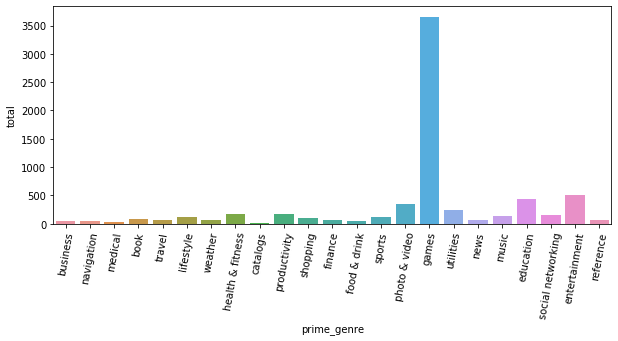

In [29]:
plt.figure(figsize=(10,4))
g = sns.barplot(x=grouping_df['prime_genre'], y=grouping_df['total'])
g.set_xticklabels(g.get_xticklabels(),rotation=80)
plt.savefig('total genres.png', bbox_inches = 'tight')
plt.show()

In [30]:
df_non_games = dict_apps['book']['data'].reset_index(drop=True)
for key in dict_apps.keys():
    if(key != 'book' and key != 'games'):
        df_non_games = df_non_games.append(dict_apps[key]['data'], ignore_index=True)
df_non_games

,id,track_name,price,cont_rating,prime_genre,vpp_lic,app_desc
0,302584613,"Kindle – Read eBooks, Magazines & Textbooks",0.00,4,book,1,turn kindle free kindle carry wherever go narr...
1,350480010,eBook: War and Peace,3.99,9,book,1,enjoy reading war peace day night multiple fon...
2,366869252,OverDrive – Library eBooks and Audiobooks,0.00,4,book,1,borrow streaming video library overdrive touch...
3,369111608,iBunkoHD,6.99,17,book,1,best way read comic realistic interface enjoy ...
4,379693831,"Audible – audio books, original series & podcasts",0.00,4,book,1,welcome audible company home unmatched selecti...
...,...,...,...,...,...,...,...
3115,1135575003,City Maps for Minecraft PE - The Best Maps for...,0.00,4,reference,1,explore best city available right browse best ...
3116,1137683736,GUNS MODS for Minecraft PC Edition - Mods Tools,0.00,12,reference,1,learn everything gun world complete one sniper...
3117,1139663852,プログレッシブ ロシア語辞典,23.99,4,reference,1,plus touch slide touch touch peek pop slide re...
3118,1156856246,Real Bike Traffic Rider Virtual Reality Glasses,0.00,17,reference,1,traffic highway rider endless racing genre who...


In [31]:
df_games = dict_apps['games']['data']
df_games = df_games.sample(len(df_non_games)).reset_index(drop=True)
df_games

,id,track_name,price,cont_rating,prime_genre,vpp_lic,app_desc
0,982923857,GodFinger 2,0.00,9,games,1,best god ever farm build grow create perfect w...
1,1101472953,Mystery Case Files: Ravenhearst Unlocked - A H...,6.99,9,games,1,pay play forever maniacal quest immortality la...
2,1133241575,The Secret Order: The Buried Kingdom HD (Full),6.99,9,games,1,unlock complete adventure single purchase last...
3,1164147984,unWorded,3.99,9,games,1,innovative narrative puzzle game everything bu...
4,1160056295,Mobile Legends: Bang bang,0.00,12,games,1,join brand new v showdown real human mobile ch...
...,...,...,...,...,...,...,...
3115,924373886,Crossy Road - Endless Arcade Hopper,0.00,9,games,1,apple design award winner chicken cross pigeon...
3116,608899141,Cut the Rope: Time Travel,0.99,4,games,1,join om back time feed candy cut rope time tra...
3117,1070525362,Cosmic Challenge: Best online space racing game,0.00,4,games,1,space race competition space race different sp...
3118,1100810556,Hidden Expedition: Dawn of Prosperity - A Myst...,6.99,9,games,1,pay play forever unusual signal vicinity old a...


In [32]:
df = df_non_games.append(df_games, ignore_index=True)
df

,id,track_name,price,cont_rating,prime_genre,vpp_lic,app_desc
0,302584613,"Kindle – Read eBooks, Magazines & Textbooks",0.00,4,book,1,turn kindle free kindle carry wherever go narr...
1,350480010,eBook: War and Peace,3.99,9,book,1,enjoy reading war peace day night multiple fon...
2,366869252,OverDrive – Library eBooks and Audiobooks,0.00,4,book,1,borrow streaming video library overdrive touch...
3,369111608,iBunkoHD,6.99,17,book,1,best way read comic realistic interface enjoy ...
4,379693831,"Audible – audio books, original series & podcasts",0.00,4,book,1,welcome audible company home unmatched selecti...
...,...,...,...,...,...,...,...
6235,924373886,Crossy Road - Endless Arcade Hopper,0.00,9,games,1,apple design award winner chicken cross pigeon...
6236,608899141,Cut the Rope: Time Travel,0.99,4,games,1,join om back time feed candy cut rope time tra...
6237,1070525362,Cosmic Challenge: Best online space racing game,0.00,4,games,1,space race competition space race different sp...
6238,1100810556,Hidden Expedition: Dawn of Prosperity - A Myst...,6.99,9,games,1,pay play forever unusual signal vicinity old a...


In [33]:
df['is_games'] = df['prime_genre'].apply(lambda x: 1 if x == 'games' else 0)
df

,id,track_name,price,cont_rating,prime_genre,vpp_lic,app_desc,is_games
0,302584613,"Kindle – Read eBooks, Magazines & Textbooks",0.00,4,book,1,turn kindle free kindle carry wherever go narr...,0
1,350480010,eBook: War and Peace,3.99,9,book,1,enjoy reading war peace day night multiple fon...,0
2,366869252,OverDrive – Library eBooks and Audiobooks,0.00,4,book,1,borrow streaming video library overdrive touch...,0
3,369111608,iBunkoHD,6.99,17,book,1,best way read comic realistic interface enjoy ...,0
4,379693831,"Audible – audio books, original series & podcasts",0.00,4,book,1,welcome audible company home unmatched selecti...,0
...,...,...,...,...,...,...,...,...
6235,924373886,Crossy Road - Endless Arcade Hopper,0.00,9,games,1,apple design award winner chicken cross pigeon...,1
6236,608899141,Cut the Rope: Time Travel,0.99,4,games,1,join om back time feed candy cut rope time tra...,1
6237,1070525362,Cosmic Challenge: Best online space racing game,0.00,4,games,1,space race competition space race different sp...,1
6238,1100810556,Hidden Expedition: Dawn of Prosperity - A Myst...,6.99,9,games,1,pay play forever unusual signal vicinity old a...,1


In [ ]:
dist_word_desc = []

for row in df.iterrows():
    tokenize = word_tokenize(row[1].app_desc)
    dist_word_desc.append(len(tokenize))
    

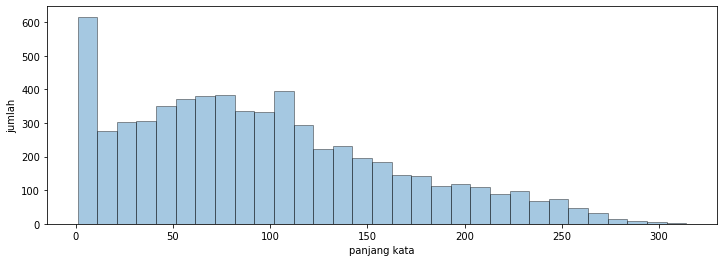

In [47]:
plt.figure(figsize=(12,4))
sns.distplot(dist_word_desc, kde=False, hist_kws=dict(edgecolor="k", linewidth=1))
plt.ylabel('jumlah')
plt.xlabel('panjang kata')
plt.savefig('dist summary.png', format='png')
plt.show()

In [34]:
df.to_csv('dataset_binary_games.csv')